In [1]:
#imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### The Data ###
[add information about the data here later]

In [2]:
#loading dataset is a dataframe object
poverty = pd.read_csv("poverty.csv")
#lists the attributes names
list(poverty.columns)

['Academic Year',
 'County Code',
 'District Code',
 'School Code',
 'County Name',
 'District Name',
 'School Name',
 'District Type',
 'School Type',
 'Educational \nOption Type',
 'NSLP \nProvision \nStatus',
 'Charter \nSchool \n(Y/N)',
 'Charter \nSchool \nNumber',
 'Charter \nFunding \nType',
 'IRC',
 'Low Grade',
 'High Grade',
 'Enrollment \n(K-12)',
 'Free Meal \nCount \n(K-12)',
 'Percent (%) \nEligible Free \n(K-12)',
 'FRPM Count \n(K-12)',
 'Percent (%) \nEligible FRPM \n(K-12)',
 'Enrollment \n(Ages 5-17)',
 'Free Meal \nCount \n(Ages 5-17)',
 'Percent (%) \nEligible Free \n(Ages 5-17)',
 'FRPM Count \n(Ages 5-17)',
 'Percent (%) \nEligible FRPM \n(Ages 5-17)',
 'CALPADS Fall 1 \nCertification Status']

### Data Cleaning ###

In [3]:
#dropping redundant columns and indexing on school code
poverty = poverty.drop(columns=['Academic Year','County Code','District Code']).set_index('School Code')

In [4]:
#handling None-type entries
poverty.fillna('Unknown')

,County Name,District Name,School Name,District Type,School Type,Educational Option Type,NSLP Provision Status,Charter School (Y/N),Charter School Number,Charter Funding Type,...,Free Meal Count (K-12),Percent (%) Eligible Free (K-12),FRPM Count (K-12),Percent (%) Eligible FRPM (K-12),Enrollment (Ages 5-17),Free Meal Count (Ages 5-17),Percent (%) Eligible Free (Ages 5-17),FRPM Count (Ages 5-17),Percent (%) Eligible FRPM (Ages 5-17),CALPADS Fall 1 Certification Status
School Code,,,,,,,,,,,,,,,,,,,,,
112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,County Office of Education (COE),High Schools (Public),Traditional,Unknown,Yes,811,Directly funded,...,262,68.10%,306,79.50%,370,249,67.30%,291,78.60%,Y
123968,Alameda,Alameda County Office of Education,Community School for Creative Education,County Office of Education (COE),Elementary Schools (Public),Traditional,Unknown,Yes,1284,Directly funded,...,118,49.00%,120,49.80%,224,113,50.40%,115,51.30%,Y
124172,Alameda,Alameda County Office of Education,Yu Ming Charter,County Office of Education (COE),Elementary Schools (Public),Traditional,Unknown,Yes,1296,Directly funded,...,58,13.00%,64,14.40%,445,58,13.00%,64,14.40%,Y
125567,Alameda,Alameda County Office of Education,Urban Montessori Charter,County Office of Education (COE),Elementary Schools (Public),Traditional,Unknown,Yes,1383,Directly funded,...,113,26.20%,131,30.30%,418,111,26.60%,129,30.90%,Y
130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,County Office of Education (COE),Juvenile Court Schools,Juvenile Court School,Unknown,No,Unknown,Unknown,...,53,100.00%,53,100.00%,50,50,100.00%,50,100.00%,Y
130419,Alameda,Alameda County Office of Education,Alameda County Community,County Office of Education (COE),County Community,County Community School,Unknown,No,Unknown,Unknown,...,106,79.70%,114,85.70%,110,86,78.20%,93,84.50%,Y
131581,Alameda,Alameda County Office of Education,Oakland Unity Middle,County Office of Education (COE),Intermediate/Middle Schools (Public),Traditional,Unknown,Yes,1707,Directly funded,...,128,69.60%,141,76.60%,184,128,69.60%,141,76.60%,Y
136101,Alameda,Alameda County Office of Education,Connecting Waters Charter - East Bay,County Office of Education (COE),K-12 Schools (Public),Traditional,Unknown,Yes,1881,Directly funded,...,41,13.10%,41,13.10%,306,39,12.70%,39,12.70%,Y
136226,Alameda,Alameda County Office of Education,Opportunity Academy,County Office of Education (COE),County Community,County Community School,Unknown,Yes,1888,Locally funded,...,34,47.90%,34,47.90%,16,8,50.00%,8,50.00%,Y


In [5]:
#data cleaning
poverty['Free Meal Count (K-12)'] = pd.to_numeric(poverty['Free Meal \nCount \n(K-12)'].str.replace(',', ''))
poverty['Percent Eligible Free (K-12)'] = pd.to_numeric(poverty['Percent (%) \nEligible Free \n(K-12)'].str.replace('%', ''))
poverty['Charter School'] = pd.to_numeric(poverty['Charter \nSchool \n(Y/N)'].fillna(0).replace(to_replace=['No ', 'No', 'Yes'], value=[0, 0, 1]))
poverty = poverty.drop(columns=['Free Meal \nCount \n(K-12)', 
                                'Percent (%) \nEligible Free \n(K-12)', 
                                'Charter \nSchool \n(Y/N)'])

### Exploratory Data Analysis ###

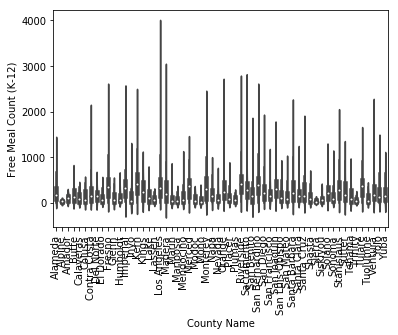

In [6]:
#sample data analysis
ax1 = sns.violinplot(x='County Name', y='Free Meal Count (K-12)', data=poverty)
supressor = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

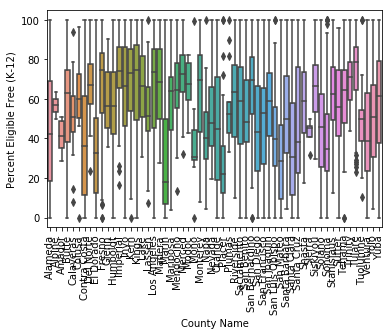

In [7]:
#sample data analysis
ax2 = sns.boxplot(x='County Name', y='Percent Eligible Free (K-12)', data=poverty)
supressor = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

### Data Analysis ###

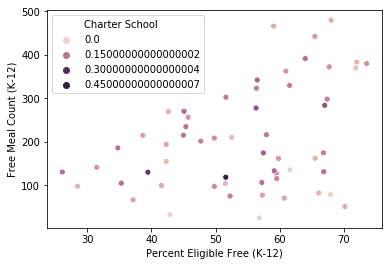

In [8]:
#sample in-depth data analysis
count_by_percent = poverty.groupby('County Name').mean()
ax3 = sns.scatterplot(x='Percent Eligible Free (K-12)', y='Free Meal Count (K-12)', hue='Charter School', data=count_by_percent)